## Question 3 How accurate are the overall results of historical RAPTOR, which was used for the historical data charts (1977-2013), compared to those of modern RAPTOR’s integration (2013-Present)?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from scipy.stats import linregress

In [13]:
latest_df = pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
historical_df = pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")
merged_df = pd.merge(historical_df, latest_df, how="outer")
merged_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
merged=pd.merge(latest_df,historical_df,how="outer")
merged.head()
merged.fillna(0,inplace=True)
clean_df=merged
clean_df.isnull().sum()
clean_df.head()

raptor_total=clean_df.groupby("team")["raptor_total"].mean()
war_total=clean_df.groupby("team")["war_total"].mean()

In [15]:
raptor_total.head()

team
ATL   -1.570031
BOS   -1.199087
BRK   -1.191441
BUF   -2.715885
CHA   -2.366248
Name: raptor_total, dtype: float64

## Calculating Historical and Latest RAPTOR totals

In [16]:
his_team_raptor_totals = historical_df.groupby("team")["raptor_total"].sum().reset_index()
his_team_raptor_totals.head()

,team,raptor_total
0,ATL,-1867.349832
1,BOS,-1461.653071
2,BRK,-300.833420
3,BUF,-100.487762
4,CHA,-858.869307


In [17]:
lat_team_raptor_totals = latest_df.groupby("team")["raptor_total"].sum().reset_index()
lat_team_raptor_totals.head()

,team,raptor_total
0,ATL,6.863266
1,BOS,-3.631239
2,BRK,-104.256530
3,CHA,-40.304983
4,CHI,-4.001443


In [18]:
merged_raptor_totals = lat_team_raptor_totals.merge(his_team_raptor_totals, on="team", suffixes=("_latest", "_historical"))
merged_raptor_totals.head()

,team,raptor_total_latest,raptor_total_historical
0,ATL,6.863266,-1867.349832
1,BOS,-3.631239,-1461.653071
2,BRK,-104.256530,-300.833420
3,CHA,-40.304983,-858.869307
4,CHI,-4.001443,-1531.152283


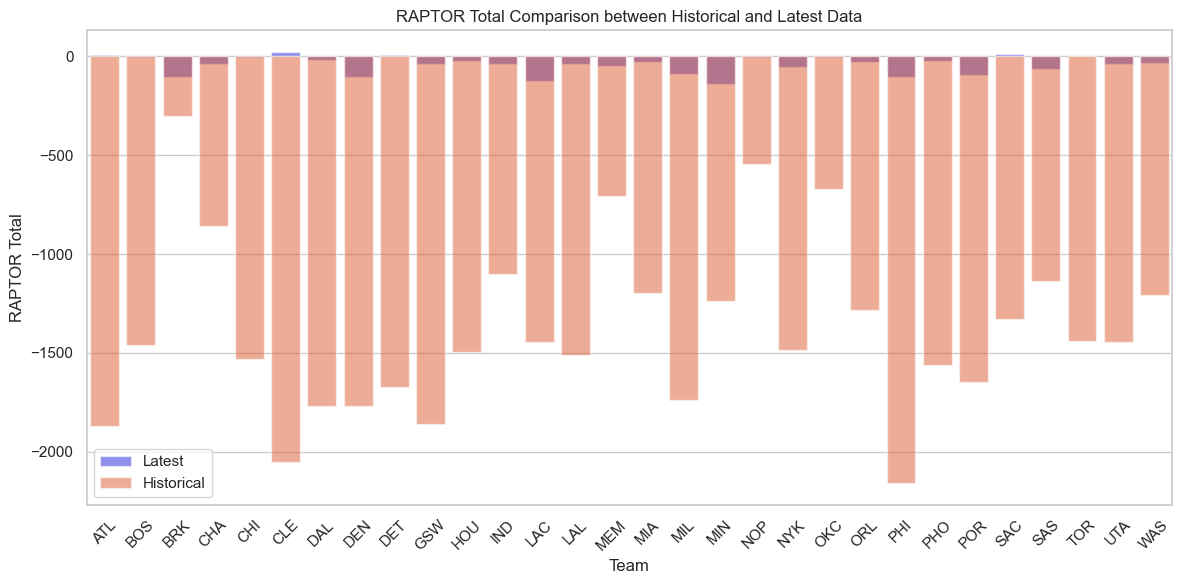

In [31]:
# Assuming you have defined merged_raptor_totals DataFrame

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_raptor_totals, x="team", y="raptor_total_latest", alpha = 0.5, color="blue", label="Latest")
sns.barplot(data=merged_raptor_totals, x="team", y="raptor_total_historical", alpha = 0.5, color="#F94C10", label="Historical")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("RAPTOR Total")
plt.title("RAPTOR Total Comparison between Historical and Latest Data")
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Calculating Historical and Latest War total

In [25]:
his_team_war_totals = historical_df.groupby("team")["war_total"].sum().reset_index()
his_team_war_totals.head()

,team,war_total
0,ATL,1319.084509
1,BOS,1712.529584
2,BRK,255.392848
3,BUF,36.396243
4,CHA,349.159085


In [26]:
lat_team_war_totals = latest_df.groupby("team")["war_total"].sum().reset_index()
lat_team_war_totals.head()  

,team,war_total
0,ATL,31.989519
1,BOS,57.010582
2,BRK,31.362127
3,CHA,12.818726
4,CHI,31.283879


In [27]:
merged_war_totals = his_team_war_totals.merge(lat_team_war_totals, on="team", suffixes=("_historical", "_latest"))

merged_war_totals.head()

,team,war_total_historical,war_total_latest
0,ATL,1319.084509,31.989519
1,BOS,1712.529584,57.010582
2,BRK,255.392848,31.362127
3,CHA,349.159085,12.818726
4,CHI,1447.384776,31.283879


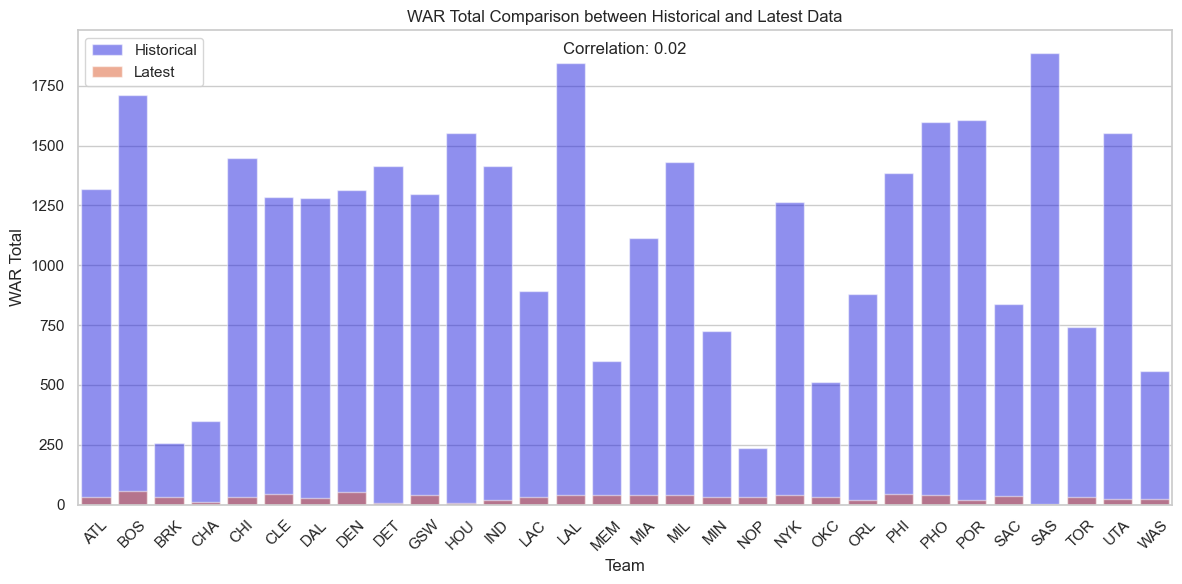

In [33]:
# Assuming you have defined merged_war_totals DataFrame

# Calculate the correlation coefficient
correlation = merged_war_totals["war_total_historical"].corr(merged_war_totals["war_total_latest"])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="war_total_historical", data=merged_war_totals, alpha = 0.5, color="blue", label="Historical")
sns.barplot(x="team", y="war_total_latest", data=merged_war_totals, alpha = 0.5, color="#F94C10", label="Latest")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("WAR Total")
plt.title("WAR Total Comparison between Historical and Latest Data")
plt.xticks(rotation=45)
plt.legend()

# Add the correlation coefficient as text on the plot
plt.text(0.5, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, ha="center")

# Show the plot
plt.tight_layout()
plt.show()


## Finding the average/mean of the RAPTOR total

In [37]:
average_his_team_raptor_total = historical_df.groupby("team")["raptor_total"].mean().reset_index()
average_his_team_raptor_total.head()

,team,raptor_total
0,ATL,-1.616753
1,BOS,-1.228280
2,BRK,-0.999447
3,BUF,-2.715885
4,CHA,-2.379139


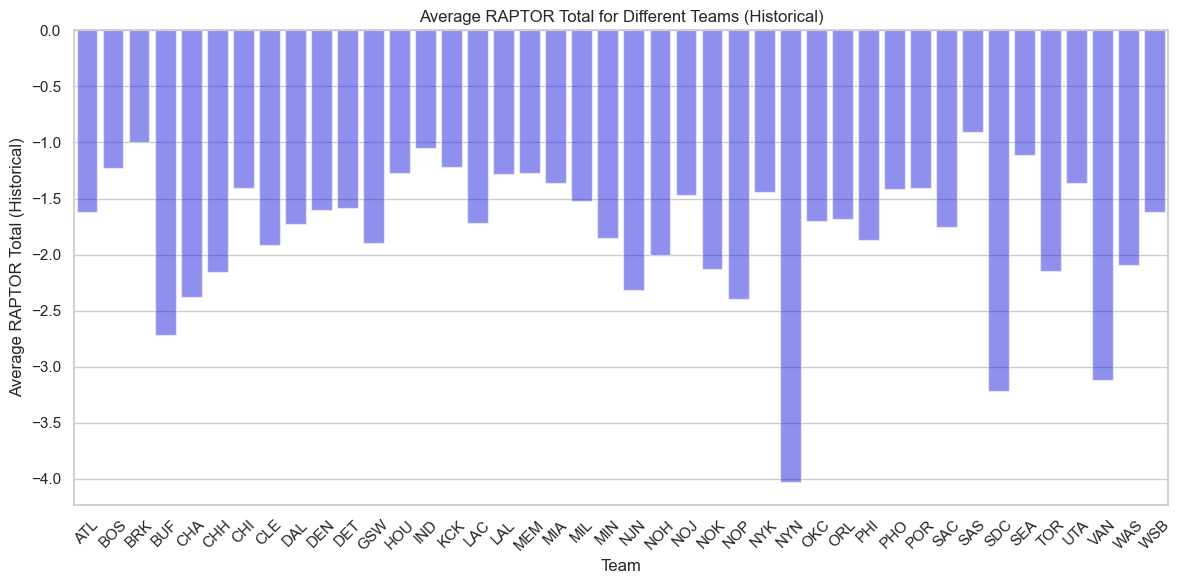

In [39]:
import matplotlib.pyplot as plt

# Assuming you have defined average_his_team_raptor_total DataFrame

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="raptor_total", data=average_his_team_raptor_total, alpha = 0.5, color="blue")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Average RAPTOR Total (Historical)")
plt.title("Average RAPTOR Total for Different Teams (Historical)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
average_lat_team_raptor_total = latest_df.groupby("team")["raptor_total"].mean().reset_index()
average_lat_team_raptor_total.head()

,team,raptor_total
0,ATL,0.228776
1,BOS,-0.113476
2,BRK,-2.673244
3,CHA,-2.121315
4,CHI,-0.222302


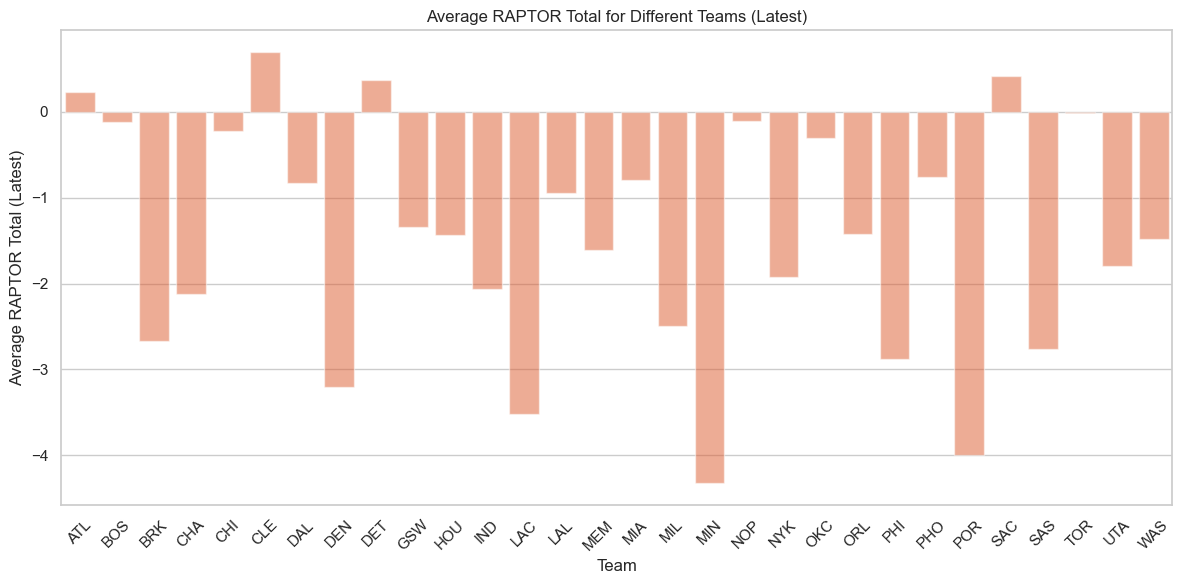

In [64]:
# Assuming you have defined average_lat_team_raptor_total DataFrame

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="raptor_total", data=average_lat_team_raptor_total, alpha = 0.5, color="#F94C10")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Average RAPTOR Total (Latest)")
plt.title("Average RAPTOR Total for Different Teams (Latest)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [47]:
merged_raptor_totals = pd.merge(average_lat_team_raptor_total, average_his_team_raptor_total, on="team", suffixes=("_latest", "_historical"))
merged_raptor_totals.head()

,team,raptor_total_latest,raptor_total_historical
0,ATL,0.228776,-1.616753
1,BOS,-0.113476,-1.228280
2,BRK,-2.673244,-0.999447
3,CHA,-2.121315,-2.379139
4,CHI,-0.222302,-1.402154


## Historical VS Latest average RAPTOR total (bar graph)

C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


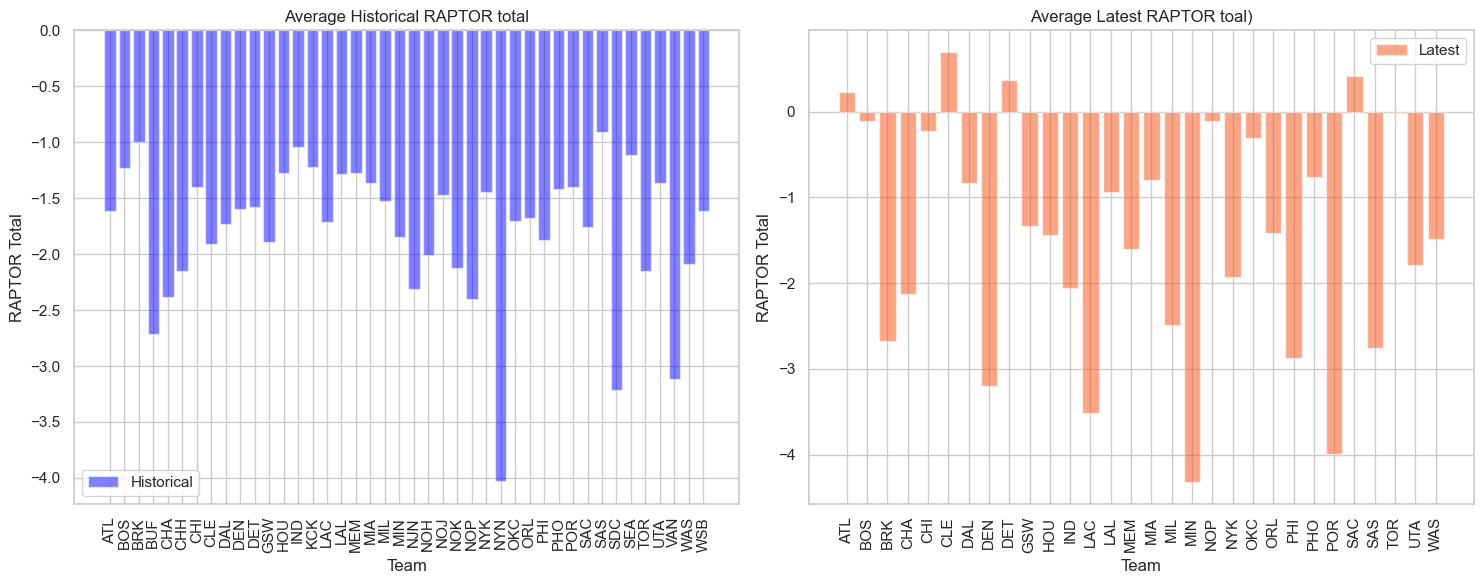

In [70]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot historical team RAPTOR means
axes[0].bar(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], alpha = 0.5, color = "blue", label="Historical")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("RAPTOR Total")
axes[0].set_title("Average Historical RAPTOR total")
axes[0].set_xticklabels(average_his_team_raptor_total["team"], rotation=90)
axes[0].legend()

# Plot latest team RAPTOR means
axes[1].bar(average_lat_team_raptor_total["team"], average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("RAPTOR Total")
axes[1].set_title("Average Latest RAPTOR toal)")
axes[1].set_xticklabels(average_lat_team_raptor_total["team"], rotation=90)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

## Historical VS Latest average RAPTOR total scatterplot 

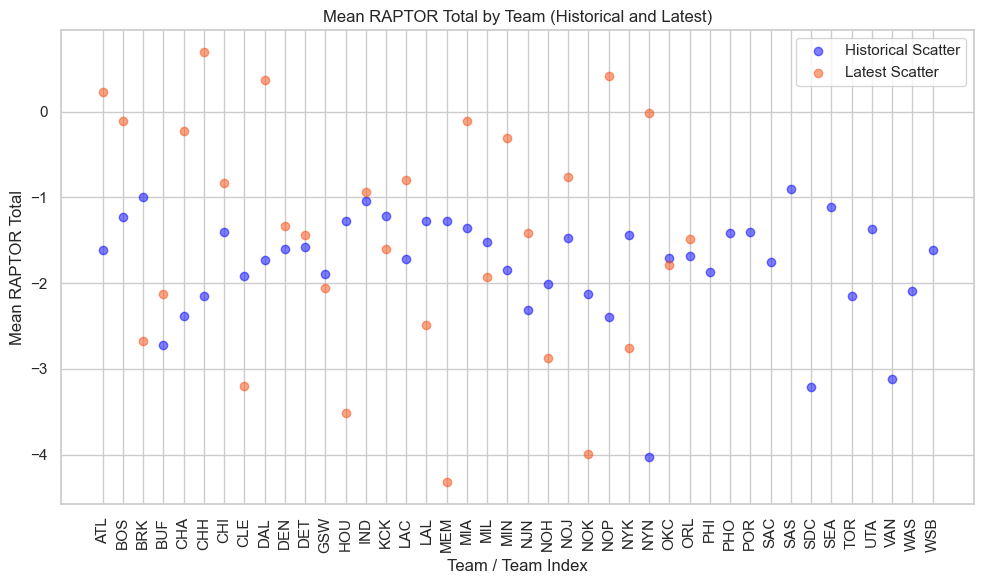

In [72]:
# Create a scatter plot with both historical and latest data
plt.figure(figsize=(10, 6))

# Scatter plot for historical team RAPTOR means
plt.scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], alpha = 0.5,color="blue", label="Historical Scatter")

# Scatter plot for latest team RAPTOR means
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest Scatter")

plt.xlabel("Team / Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical and Latest)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

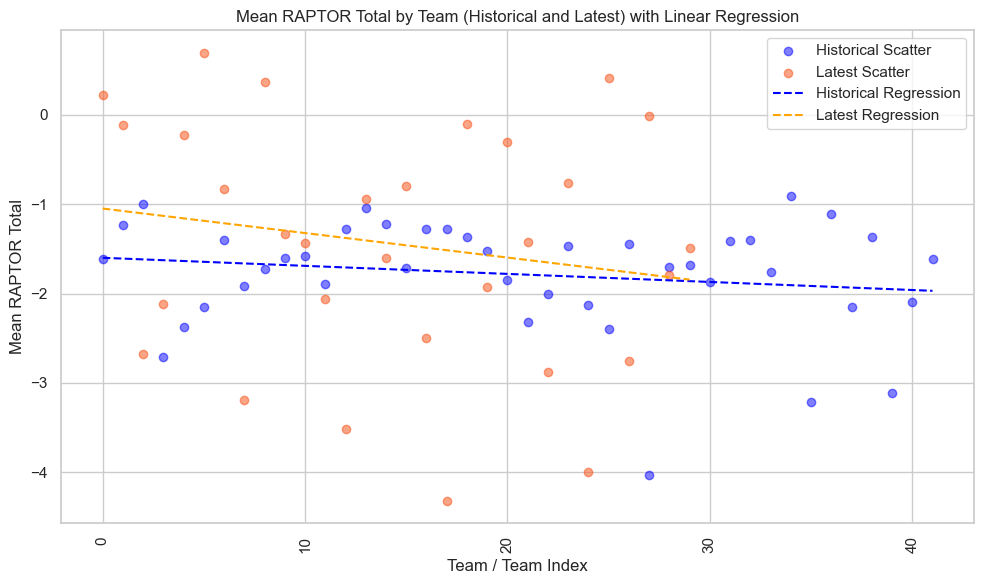

In [74]:
# Create a scatter plot with both historical and latest data
plt.figure(figsize=(10, 6))

# Scatter plot for historical team RAPTOR means
plt.scatter(average_his_team_raptor_total.index, average_his_team_raptor_total["raptor_total"], alpha = 0.5, color="blue", label="Historical Scatter")

# Scatter plot for latest team RAPTOR means
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest Scatter")

# Linear regression for historical data
hist_x = average_his_team_raptor_total.index.values
hist_y = average_his_team_raptor_total["raptor_total"].values
hist_slope, hist_intercept = np.polyfit(hist_x, hist_y, 1)
plt.plot(hist_x, hist_slope * hist_x + hist_intercept, color="blue", linestyle="--", label="Historical Regression")

# Linear regression for latest data
lat_x = average_lat_team_raptor_total.index.values
lat_y = average_lat_team_raptor_total["raptor_total"].values
lat_slope, lat_intercept = np.polyfit(lat_x, lat_y, 1)
plt.plot(lat_x, lat_slope * lat_x + lat_intercept, color="orange", linestyle="--", label="Latest Regression")

plt.xlabel("Team / Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical and Latest) with Linear Regression")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## Finding the average/mean of the RAPTOR war total 

In [58]:
average_his_team_war_totals = historical_df.groupby("team")["war_total"].mean().reset_index()
average_his_team_war_totals.head()

,team,war_total
0,ATL,1.142065
1,BOS,1.439100
2,BRK,0.848481
3,BUF,0.983682
4,CHA,0.967200


In [59]:
average_lat_team_war_totals = latest_df.groupby("team")["war_total"].mean().reset_index()
average_lat_team_war_totals.head()

,team,war_total
0,ATL,1.066317
1,BOS,1.781581
2,BRK,0.804157
3,CHA,0.674670
4,CHI,1.737993


## Historical VS Latest War totals

C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


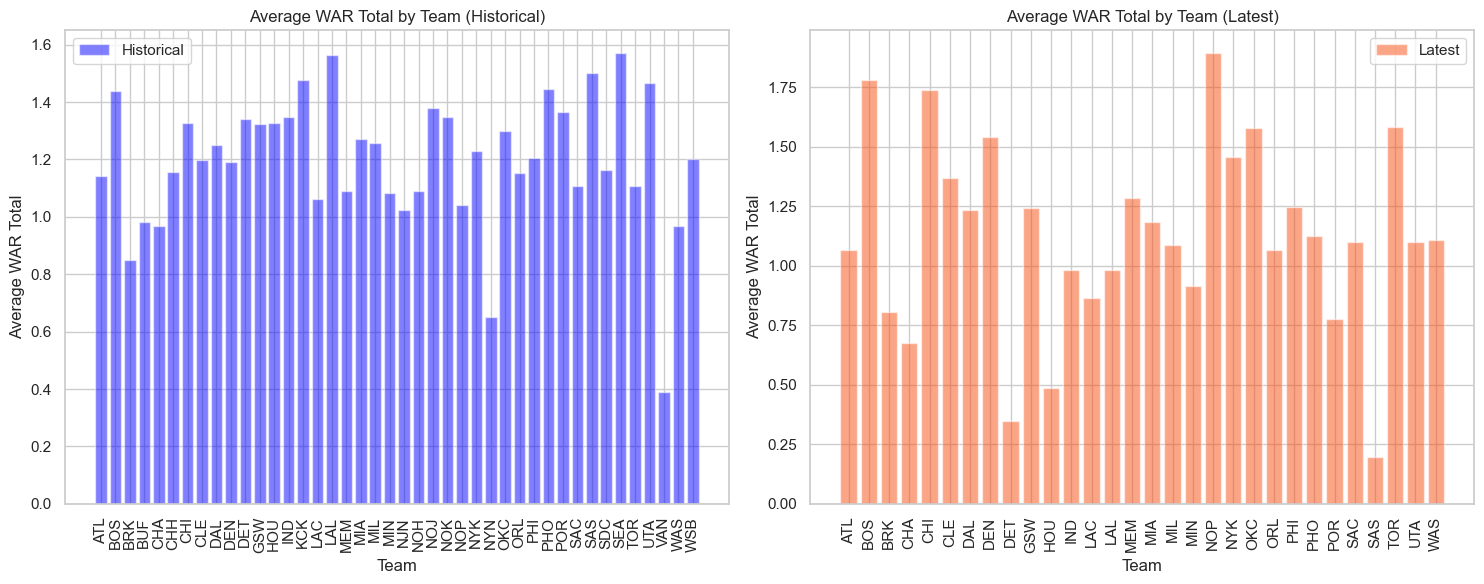

In [76]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot average historical team WAR totals (bar plot)
axes[0].bar(average_his_team_war_totals["team"], average_his_team_war_totals["war_total"], alpha = 0.5, color = "blue", label="Historical")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Average WAR Total")
axes[0].set_title("Average WAR Total by Team (Historical)")
axes[0].set_xticklabels(average_his_team_war_totals["team"], rotation=90)
axes[0].legend()

# Plot average latest team WAR totals (bar plot)
axes[1].bar(average_lat_team_war_totals["team"], average_lat_team_war_totals["war_total"], alpha =0.5, color="#F94C10", label="Latest")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("Average WAR Total")
axes[1].set_title("Average WAR Total by Team (Latest)")
axes[1].set_xticklabels(average_lat_team_war_totals["team"], rotation=90)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

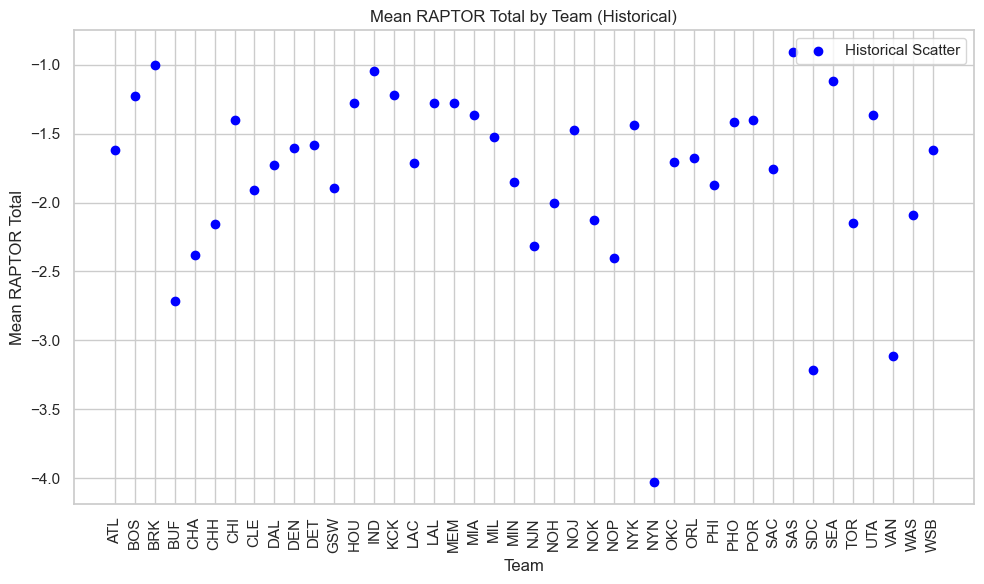

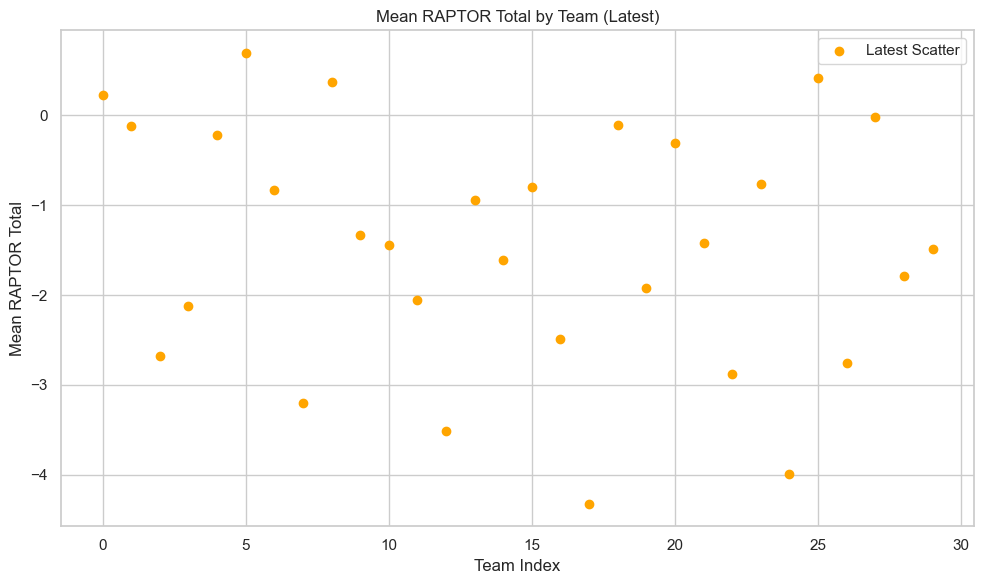

In [77]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], color="blue", label="Historical Scatter")
plt.xlabel("Team")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
# Create a scatter plot for latest team RAPTOR means
plt.figure(figsize=(10, 6))
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], color="orange", label="Latest Scatter")
plt.xlabel("Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Latest)")
plt.legend()
plt.tight_layout()
plt.show()

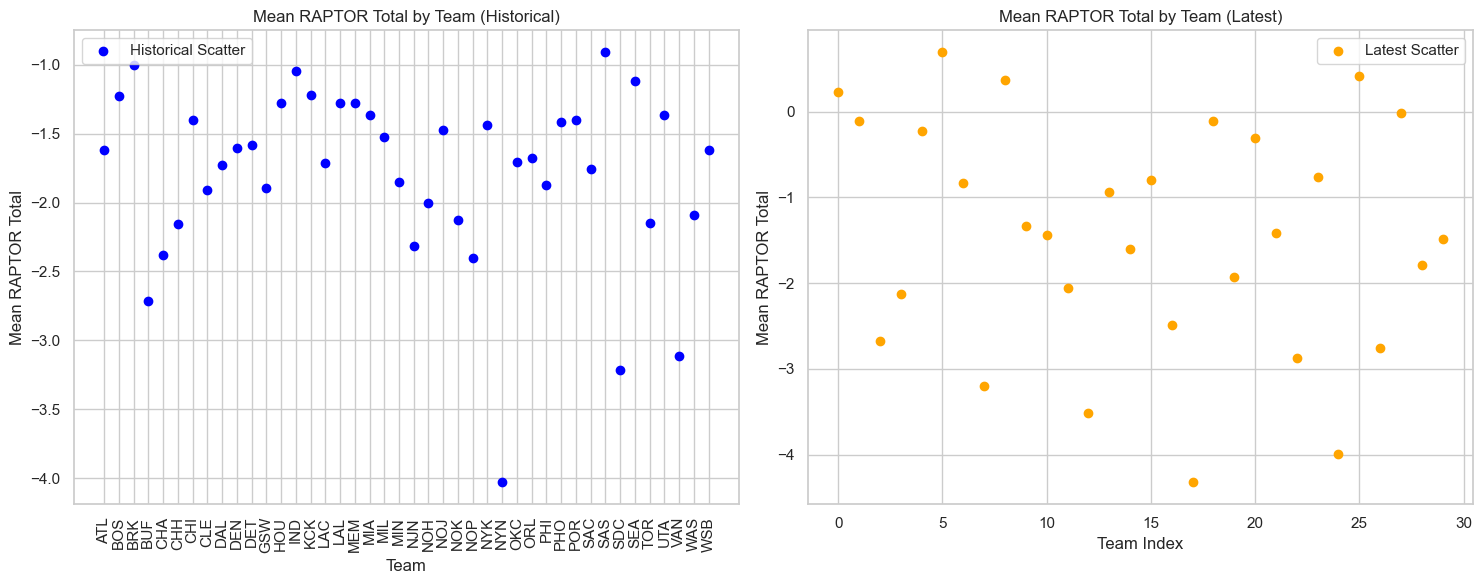

In [81]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for historical team RAPTOR means
axes[0].scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], color="blue", label="Historical Scatter")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Mean RAPTOR Total")
axes[0].set_title("Mean RAPTOR Total by Team (Historical)")
axes[0].tick_params(axis="x", rotation=90)
axes[0].legend()

# Scatter plot for latest team RAPTOR means
axes[1].scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], color="orange", label="Latest Scatter")
axes[1].set_xlabel("Team Index")
axes[1].set_ylabel("Mean RAPTOR Total")
axes[1].set_title("Mean RAPTOR Total by Team (Latest)")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()


## Pie graph with correlation between War total latest and historical

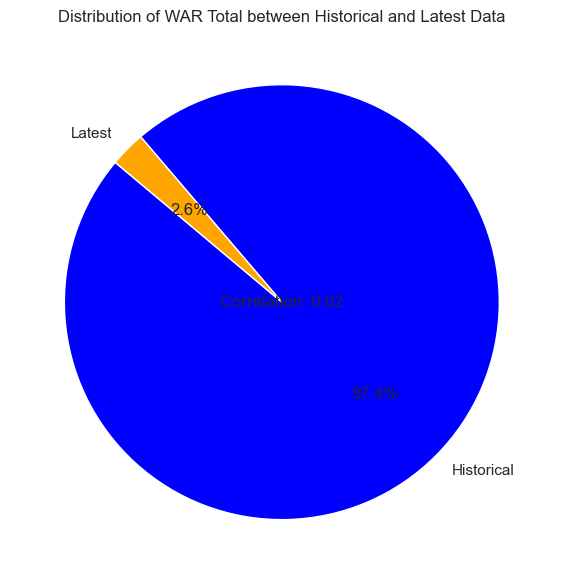

In [83]:
# Assuming you have defined merged_war_totals DataFrame

# Calculate the correlation coefficient
correlation = merged_war_totals["war_total_historical"].corr(merged_war_totals["war_total_latest"])

# Set the style for the plot
sns.set(style="whitegrid")

# Calculate the sum of "war_total_historical" and "war_total_latest"
sum_historical = merged_war_totals["war_total_historical"].sum()
sum_latest = merged_war_totals["war_total_latest"].sum()

# Create data for the pie chart
labels = ["Historical", "Latest"]
sizes = [sum_historical, sum_latest]
colors = ["blue", "orange"]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of WAR Total between Historical and Latest Data")

# Show the correlation coefficient as text
plt.text(0.5, 0.5, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, ha="center", va="center")

# Show the plot
plt.tight_layout()
plt.show()
